### Problem Statement

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_recall_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### Data Cleaning and preprocessing

In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.columns=['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit']

In [9]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [10]:
df=df.astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    float64
 1   GRE_Score          400 non-null    float64
 2   TOEFL_Score        400 non-null    float64
 3   University_Rating  400 non-null    float64
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    float64
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(9)
memory usage: 28.2 KB


In [13]:
df.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
df.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot: >

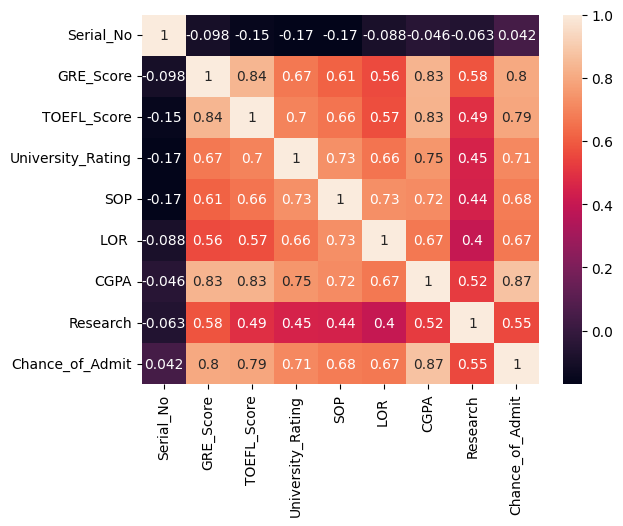

In [15]:
sns.heatmap(df.corr(),annot=True)

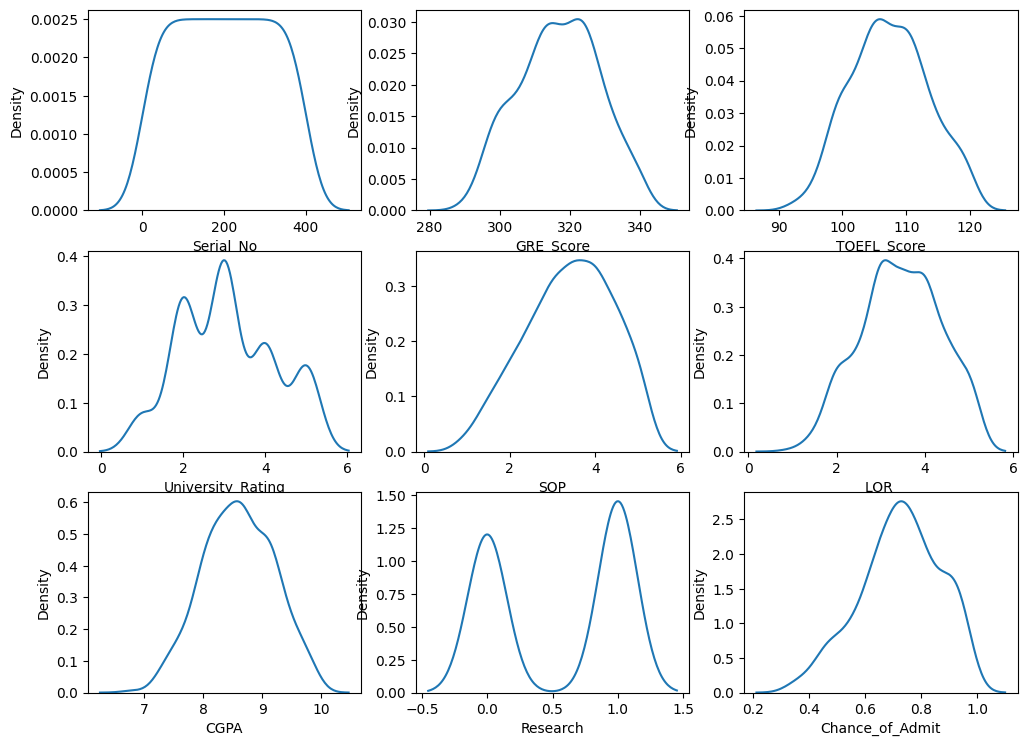

In [18]:
i=1
plt.figure(figsize=(12,12))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.kdeplot(df[col])
    i+=1

In [19]:
df.skew()

Serial_No            0.000000
GRE_Score           -0.062893
TOEFL_Score          0.057216
University_Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance_of_Admit     -0.353448
dtype: float64

In [21]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


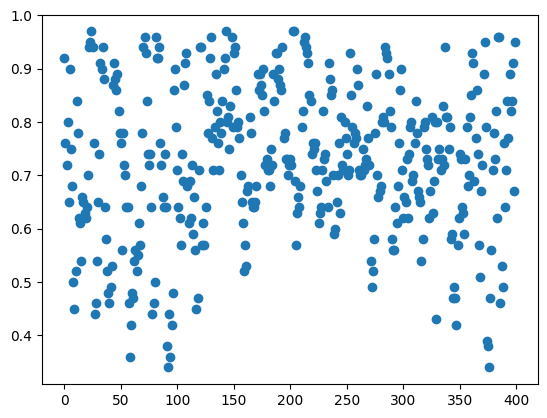

In [24]:
plt.scatter(df['Chance_of_Admit'].index,df['Chance_of_Admit'])

<AxesSubplot: xlabel='Chance_of_Admit', ylabel='Density'>

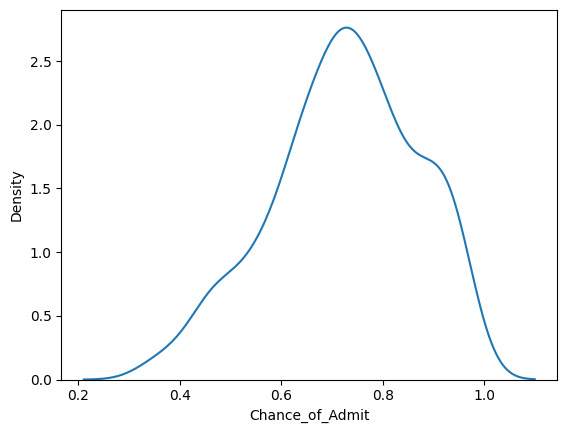

In [26]:
sns.kdeplot(df['Chance_of_Admit'])

In [27]:
df['Chance_of_Admit']=[1 if i>=0.8 else 0 for i in df['Chance_of_Admit']]

In [29]:
df['Chance_of_Admit'].value_counts()

0    272
1    128
Name: Chance_of_Admit, dtype: int64

In [58]:
128*100/400

32.0

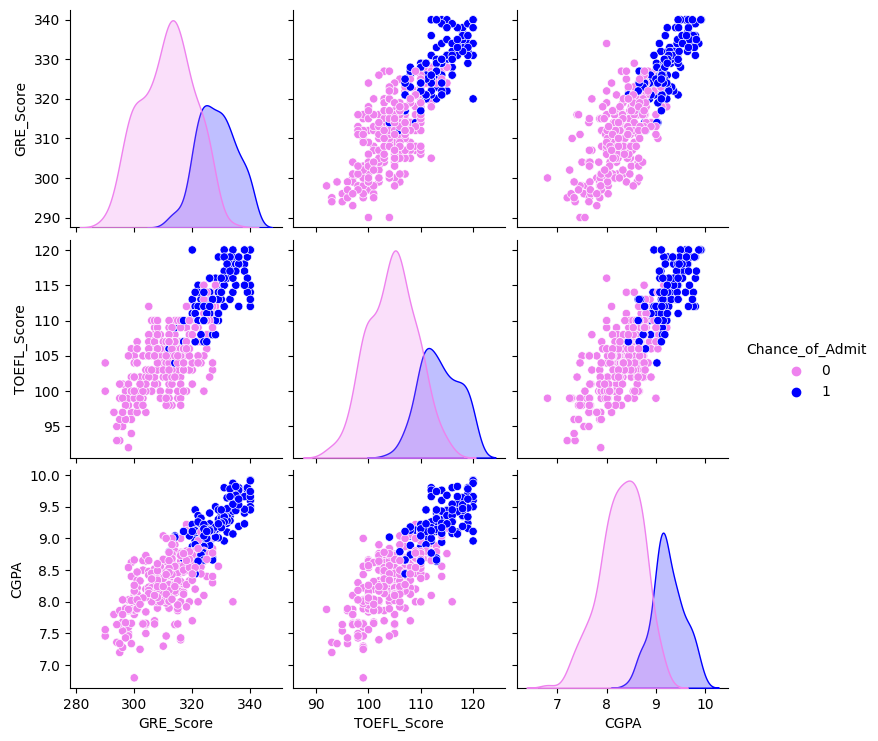

In [31]:
sns.pairplot(data=df[['GRE_Score','TOEFL_Score','CGPA','Chance_of_Admit']],
            hue='Chance_of_Admit',palette=['Violet','Blue'])

In [32]:
df.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.32000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.46706
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.00000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.00000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.00000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.00000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.00000


In [36]:
df.drop('Serial_No',axis=1,inplace=True)

In [37]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0
...,...,...,...,...,...,...,...,...
395,324.0,110.0,3.0,3.5,3.5,9.04,1.0,1
396,325.0,107.0,3.0,3.0,3.5,9.11,1.0,1
397,330.0,116.0,4.0,5.0,4.5,9.45,1.0,1
398,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0


In [38]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### Train Model

In [39]:
x=df.drop('Chance_of_Admit',axis=1)
y=df['Chance_of_Admit']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 7)
(100, 7)
(300,)
(100,)


In [43]:
300*100/400

75.0

In [47]:
model=LogisticRegression()

In [48]:
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=model.predict(x_test)

In [50]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [51]:
d=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
d

,y_test,y_pred
224,0,0
299,0,1
294,0,0
59,0,0
187,1,1
...,...,...
212,1,1
129,1,1
13,0,0
191,1,1


In [52]:
d['y_pred'].value_counts()

0    68
1    32
Name: y_pred, dtype: int64

<AxesSubplot: xlabel='y_pred', ylabel='count'>

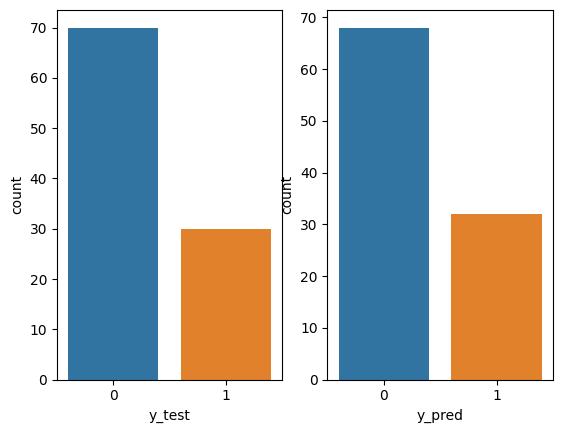

In [56]:
plt.subplot(1,2,1)
sns.countplot(x=d['y_test'])
plt.subplot(1,2,2)
sns.countplot(x=d['y_pred'])

In [57]:
32*100/100

32.0

In [59]:
print(confusion_matrix(y_test,y_pred))

[[65  5]
 [ 3 27]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        70
           1       0.84      0.90      0.87        30

    accuracy                           0.92       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



### Calculate AUC for ROC Curve

In [61]:
y_prob=model.predict_proba(x_test)

In [63]:
# y_prob

In [64]:
fpr,tpr,threshold=roc_curve(y_test,y_prob[:,1])

In [65]:
auc(fpr,tpr)

0.9814285714285714

Text(0, 0.5, 'TPR')

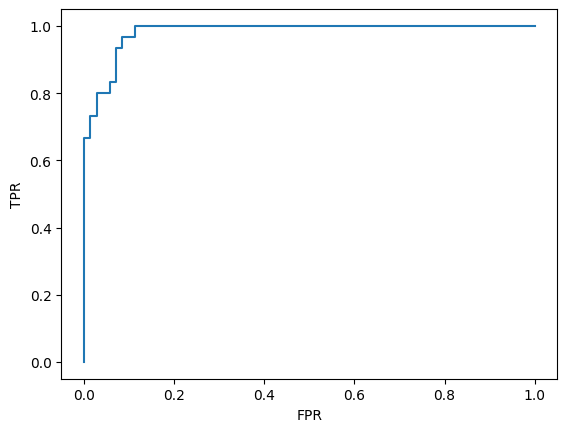

In [70]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [66]:
p,r,t=precision_recall_curve(y_test,y_prob[:,1])

In [67]:
auc(r,p)

0.958150747633222

Text(0, 0.5, 'Precision')

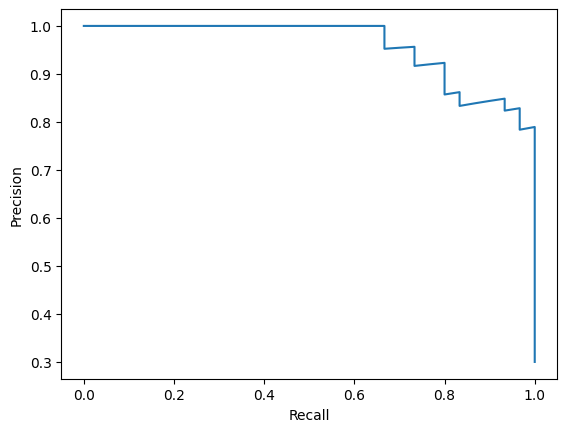

In [69]:
plt.plot(r,p)
plt.xlabel('Recall')
plt.ylabel('Precision')

### User Input

In [ ]:
# Serial_No	GRE_Score	TOEFL_Score	University_Rating	SOP	LOR	CGPA	Research	Chance_of_Admit
# 1.0	   337.0	    118.0	    4.0	                4.5	4.5	9.65	1.0	        0.92
# 2.0	324.0	107.0	4.0	4.0	4.5	8.87	1.0	0.76
# 3.0	316.0	104.0	3.0	3.0	3.5	8.00	1.0	0.72
# 4.0	322.0	110.0	3.0	3.5	2.5	8.67	1.0	0.80
# 5.0	314.0	103.0	2.0	2.0	3.0	8.21	0.0	0.65

In [73]:
GRE_Score=337
TOEFL_Score=118
University_Rating=4
SOP=4.5
LOR=4.5
CGPA=9.65
Research=1

pred_input=np.array([GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research])
pred_output=model.predict([pred_input])[0]

In [75]:
if pred_output==1:
    print("Getting Chances of Admission")
elif pred_output==0:
    print("No Chance of Admission")

Getting Chances of Admission


In [76]:
import pickle

In [77]:
with open("Graduation_Admission_model.pickle","wb") as file:
    pickle.dump(model,file)